In [ ]:
!unzip fashion-mnist-master.zip

Archive:  fashion-mnist-master.zip
b2617bb6d3ffa2e429640350f613e3291e10b141
   creating: fashion-mnist-master/
  inflating: fashion-mnist-master/.catwatch.yaml  
 extracting: fashion-mnist-master/.dockerignore  
  inflating: fashion-mnist-master/.gitignore  
  inflating: fashion-mnist-master/.zappr.yaml  
  inflating: fashion-mnist-master/CONTRIBUTING.md  
  inflating: fashion-mnist-master/Dockerfile  
  inflating: fashion-mnist-master/LICENSE  
  inflating: fashion-mnist-master/MAINTAINERS  
  inflating: fashion-mnist-master/README.ja.md  
  inflating: fashion-mnist-master/README.md  
  inflating: fashion-mnist-master/README.zh-CN.md  
  inflating: fashion-mnist-master/app.py  
   creating: fashion-mnist-master/benchmark/
 extracting: fashion-mnist-master/benchmark/__init__.py  
  inflating: fashion-mnist-master/benchmark/baselines.json  
  inflating: fashion-mnist-master/benchmark/convnet.py  
  inflating: fashion-mnist-master/benchmark/runner.py  
  inflating: fashion-mnist-master/c

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import DataLoader, random_split

# Transformations to be applied to the images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
train_set = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)

# Download and load the test data
test_set = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

# Class names for Fashion-MNIST
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 5.13MB/s]


In [ ]:
# Split training data into training and validation sets
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size
train_dataset, val_dataset = random_split(train_set, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_set)}")

Number of training samples: 48000
Number of validation samples: 12000
Number of test samples: 10000


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

ann_model = ANN()
print(ann_model)

ANN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

cnn_model = CNN()
print(cnn_model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


--- Training ANN ---
Epoch 1, Loss: 0.5420440021753311
Validation Accuracy: 84.54166666666667 %
Epoch 2, Loss: 0.39261808929840725
Validation Accuracy: 86.75833333333334 %
Epoch 3, Loss: 0.3541671844224135
Validation Accuracy: 86.94166666666666 %
Epoch 4, Loss: 0.3251638951400916
Validation Accuracy: 87.75 %
Epoch 5, Loss: 0.3082988760570685
Validation Accuracy: 87.76666666666667 %
Epoch 6, Loss: 0.29444386971990266
Validation Accuracy: 87.825 %
Epoch 7, Loss: 0.2797415490647157
Validation Accuracy: 88.51666666666667 %
Epoch 8, Loss: 0.2678131426076094
Validation Accuracy: 88.31666666666666 %
Epoch 9, Loss: 0.2575965076883634
Validation Accuracy: 88.55 %
Epoch 10, Loss: 0.24930275297164917
Validation Accuracy: 87.75833333333334 %
Finished Training
Test Accuracy: 86.85 %


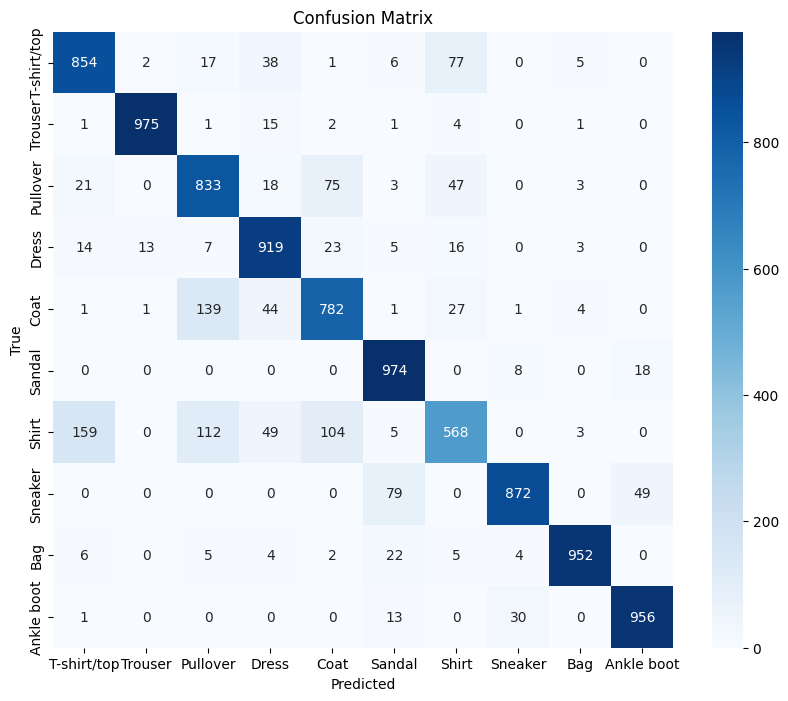


--- Training CNN ---
Epoch 1, Loss: 0.5061492338875929
Validation Accuracy: 86.43333333333334 %
Epoch 2, Loss: 0.3336283947825432
Validation Accuracy: 88.36666666666666 %
Epoch 3, Loss: 0.2865576042830944
Validation Accuracy: 89.59166666666667 %
Epoch 4, Loss: 0.2547871876358986
Validation Accuracy: 90.08333333333333 %
Epoch 5, Loss: 0.228293867568175
Validation Accuracy: 90.575 %
Epoch 6, Loss: 0.20443166438738505
Validation Accuracy: 90.84166666666667 %
Epoch 7, Loss: 0.18418535486857096
Validation Accuracy: 90.625 %
Epoch 8, Loss: 0.1664460276911656
Validation Accuracy: 91.16666666666667 %
Epoch 9, Loss: 0.14750724121928216
Validation Accuracy: 91.43333333333334 %
Epoch 10, Loss: 0.13058460794885954
Validation Accuracy: 90.81666666666666 %
Finished Training
Test Accuracy: 90.41 %


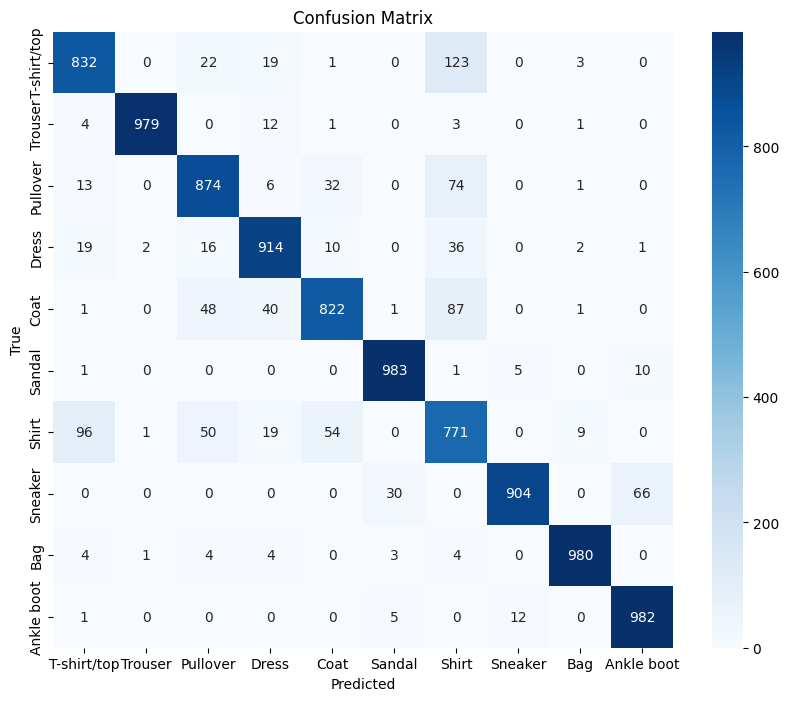

In [ ]:
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, test_loader, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

        # Validation
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print(f'Validation Accuracy: {100 * correct / total} %')

    print('Finished Training')

    # Testing
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    print(f'Test Accuracy: {100 * correct / total} %')

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Train and evaluate the ANN model
print("--- Training ANN ---")
train_and_evaluate(ann_model, train_loader, val_loader, test_loader)

# Train and evaluate the CNN model
print("\n--- Training CNN ---")
train_and_evaluate(cnn_model, train_loader, val_loader, test_loader)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import numpy as np

# Define a transform for the training set with data augmentation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # Flips the image horizontally with a default probability of 0.5
    transforms.RandomRotation(10),     # Rotates the image by a random angle between -10 and 10 degrees
    transforms.ToTensor(),             # Converts the image to a PyTorch tensor
    transforms.Normalize((0.5,), (0.5,)) # Normalizes pixel values to be between -1 and 1
])

# Define a transform for the validation and test sets (no augmentation)
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data with the augmentation transform
train_set = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                              download=True, transform=train_transform)

# Download and load the test data with the standard transform
test_set = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                             download=True, transform=test_transform)

# Split the original training set into a new training and a validation set
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size
train_dataset, val_dataset = random_split(train_set, [train_size, val_size])

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Class names for Fashion-MNIST
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

print("Data loaders with augmentation for the training set are ready.")

Data loaders with augmentation for the training set are ready.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ImprovedANN(nn.Module):
    def __init__(self):
        super(ImprovedANN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.5) # Added dropout layer
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the image
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x) # Applied dropout
        x = self.fc3(x)
        return x

ann_model = ImprovedANN()
print("--- Improved ANN Model Architecture ---")
print(ann_model)

--- Improved ANN Model Architecture ---
ImprovedANN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(0.5), # Dropout layer to prevent overfitting
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        return x

cnn_model = ImprovedCNN()
print("\n--- Improved CNN Model Architecture ---")
print(cnn_model)


--- Improved CNN Model Architecture ---
ImprovedCNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)



===== Training Improved ANN =====
Epoch 1/15, Loss: 0.7671, Validation Accuracy: 80.00%
Epoch 2/15, Loss: 0.5742, Validation Accuracy: 81.69%
Epoch 3/15, Loss: 0.5284, Validation Accuracy: 83.11%
Epoch 4/15, Loss: 0.4983, Validation Accuracy: 83.36%
Epoch 5/15, Loss: 0.4799, Validation Accuracy: 84.29%
Epoch 6/15, Loss: 0.4650, Validation Accuracy: 84.38%
Epoch 7/15, Loss: 0.4489, Validation Accuracy: 84.88%
Epoch 8/15, Loss: 0.4360, Validation Accuracy: 85.63%
Epoch 9/15, Loss: 0.4267, Validation Accuracy: 85.58%
Epoch 10/15, Loss: 0.4231, Validation Accuracy: 86.02%
Epoch 11/15, Loss: 0.4109, Validation Accuracy: 86.35%
Epoch 12/15, Loss: 0.4035, Validation Accuracy: 86.47%
Epoch 13/15, Loss: 0.4000, Validation Accuracy: 86.35%
Epoch 14/15, Loss: 0.3911, Validation Accuracy: 85.47%
Epoch 15/15, Loss: 0.3906, Validation Accuracy: 86.98%
Finished Training.

Accuracy of Improved ANN on the 10000 test images: 86.33 %


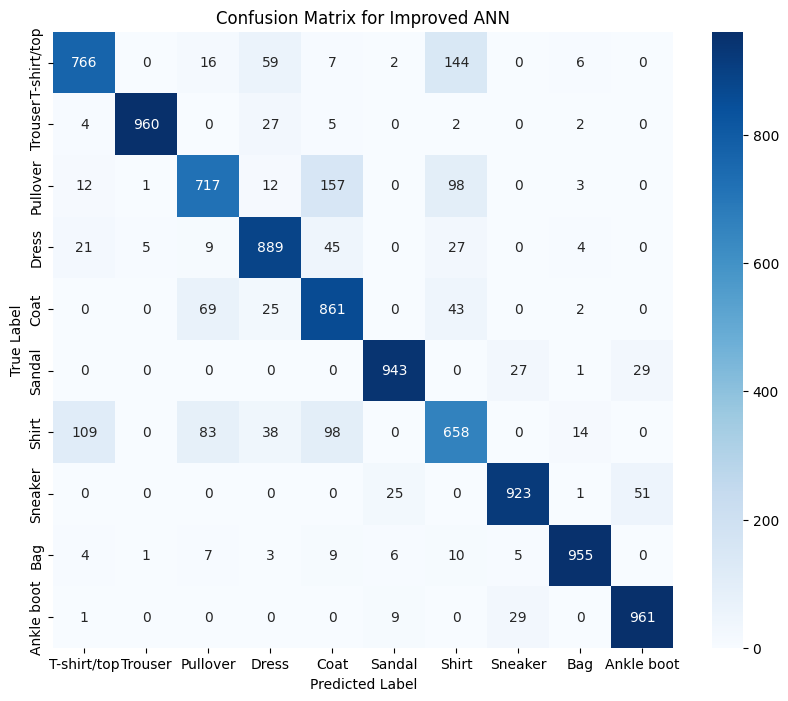


===== Training Improved CNN =====
Epoch 1/15, Loss: 0.6769, Validation Accuracy: 84.54%
Epoch 2/15, Loss: 0.4699, Validation Accuracy: 86.97%
Epoch 3/15, Loss: 0.4109, Validation Accuracy: 87.78%
Epoch 4/15, Loss: 0.3785, Validation Accuracy: 88.67%
Epoch 5/15, Loss: 0.3489, Validation Accuracy: 89.34%
Epoch 6/15, Loss: 0.3354, Validation Accuracy: 90.11%
Epoch 7/15, Loss: 0.3246, Validation Accuracy: 90.17%
Epoch 8/15, Loss: 0.3092, Validation Accuracy: 90.33%
Epoch 9/15, Loss: 0.3031, Validation Accuracy: 90.31%
Epoch 10/15, Loss: 0.2946, Validation Accuracy: 90.26%
Epoch 11/15, Loss: 0.2814, Validation Accuracy: 91.09%
Epoch 12/15, Loss: 0.2782, Validation Accuracy: 91.12%
Epoch 13/15, Loss: 0.2739, Validation Accuracy: 90.66%
Epoch 14/15, Loss: 0.2675, Validation Accuracy: 91.37%
Epoch 15/15, Loss: 0.2654, Validation Accuracy: 91.37%
Finished Training.

Accuracy of Improved CNN on the 10000 test images: 91.36 %


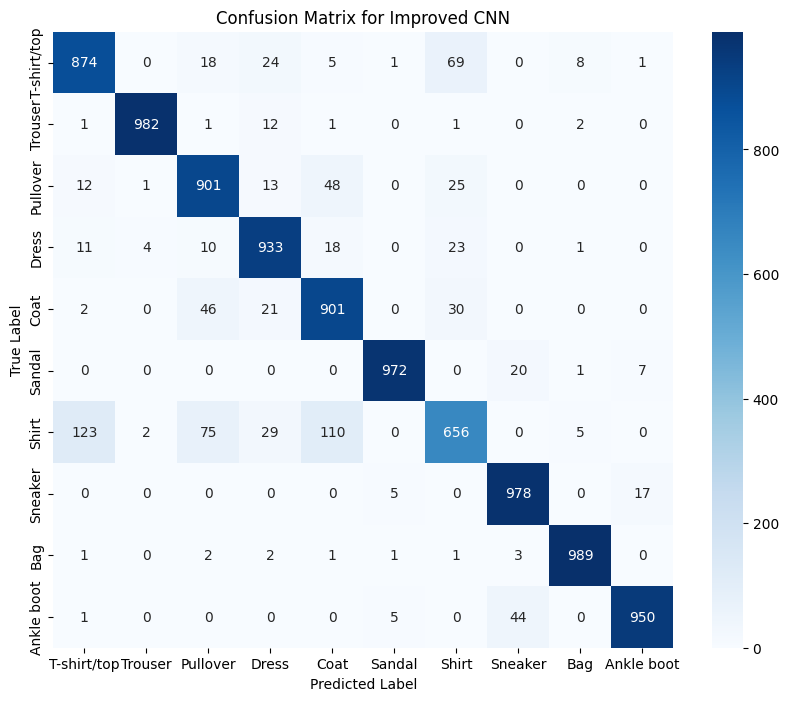

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch.optim as optim

def train_evaluate_and_plot(model, model_name="Model", epochs=15):
    print(f"\n===== Training {model_name} =====")
    # Hyperparameter Choice: Adam is a robust optimizer that often works well with default settings.
    # A learning rate of 0.001 is a common and effective starting point for many problems.
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validate the model
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Validation Accuracy: {100 * val_correct / val_total:.2f}%')

    print('Finished Training.')

    # Evaluate on the test set
    model.eval()
    test_correct = 0
    test_total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print(f'\nAccuracy of {model_name} on the 10000 test images: {100 * test_correct / test_total:.2f} %')

    # Plot Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Train and evaluate the ANN model
train_evaluate_and_plot(ann_model, model_name="Improved ANN")

# Train and evaluate the improved CNN model
train_evaluate_and_plot(cnn_model, model_name="Improved CNN")